In [52]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [53]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [54]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [55]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    error = y - tx.dot(w)
    loss = 1/(2*y.shape[0]) * np.sum(error**2)
    return loss

print(compute_loss(y, tx, np.array([1, 2])))

2694.4833658870843


# 2. Grid Search

Fill in the function `grid_search()` below:

In [56]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            losses[i, j] = compute_loss(y, tx, np.array([w0, w1]))
    return losses

Let us play with the grid search demo now!

In [57]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.005 seconds


# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [58]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************
    error = y - tx.dot(w)
    gradient = -1/(y.shape[0]) * tx.T.dot(error)
    return gradient

Please fill in the functions `gradient_descent` below:

In [59]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [60]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()

# Define arbitrary arrays for y and tx (a enlever plus tard)


# Run gradient descent with the arbitrary arrays
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=1062606.4462798769, w0=-892.6706077997894, w1=901.3479712434988
GD iter. 1/49: loss=860714.1448053952, w0=-796.0741548195997, w1=812.5611453626477
GD iter. 2/49: loss=697181.3806110647, w0=-709.1373471374292, w1=732.6530020698816
GD iter. 3/49: loss=564719.8416136572, w0=-630.8942202234757, w1=660.7356731063921
GD iter. 4/49: loss=457425.99502575735, w0=-560.4754060009176, w1=596.0100770392519
GD iter. 5/49: loss=370517.9792895585, w0=-497.0984732006152, w1=537.7570405788256
GD iter. 6/49: loss=300122.4865432374, w0=-440.05923368034314, w1=485.32930776444186
GD iter. 7/49: loss=243102.1374187173, w0=-388.7239181120982, w1=438.14434823149645
GD iter. 8/49: loss=196915.65462785604, w0=-342.52213410067776, w1=395.67788465184566
GD iter. 9/49: loss=159504.60356725843, w0=-300.94052849039946, w1=357.45806743016004
GD iter. 10/49: loss=129201.65220817438, w0=-263.517083441149, w1=323.0602319306429
GD iter. 11/49: loss=104656.26160731632, w0=-229.8359828968235, w1=292.1021

In [61]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

ModuleNotFoundError: No module named 'ipywidgets'

# 4. Stochastic gradient descent

In [62]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    gradient = compute_gradient(y, tx, w)
    return gradient


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        for batch_y, batch_tx in batch_iter(y, tx, batch_size):
            gradient = compute_stoch_gradient(batch_y, batch_tx, w)
            loss = compute_loss(batch_y, batch_tx, w)
            w = w - gamma * gradient
            ws.append(w)
            losses.append(loss)
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [63]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=1478.4168761832668, w0=5.437677585483102, w1=-7.702164219443922
SGD iter. 1/49: loss=1427.622276203264, w0=10.781126427201837, w1=-10.395559374320449
SGD iter. 2/49: loss=2659.576635999685, w0=18.074378974590672, w1=-5.670561078765635
SGD iter. 3/49: loss=656.0256806325144, w0=21.69660392793776, w1=-9.303152348263495
SGD iter. 4/49: loss=4326.483003179391, w0=30.99873594503942, w1=9.287077768517062
SGD iter. 5/49: loss=1152.6168758970034, w0=35.80002093115929, w1=11.766592404618962
SGD iter. 6/49: loss=907.4372338482192, w0=40.06015528079715, w1=14.696245242535664
SGD iter. 7/49: loss=507.5511792693538, w0=43.24622238388633, w1=18.594434227632583
SGD iter. 8/49: loss=251.9614360200638, w0=45.49104503175882, w1=17.587065824458104
SGD iter. 9/49: loss=400.98342736071186, w0=48.32294696283169, w1=20.083867193189075
SGD iter. 10/49: loss=112.34489498192029, w0=49.821912572723534, w1=19.66318421621703
SGD iter. 11/49: loss=234.37795943765363, w0=51.986989751198486, w1=2

In [20]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

ModuleNotFoundError: No module named 'ipywidgets'

# 5. Effect of Outliers and MAE Cost Function

In [70]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [71]:
y.shape, tx.shape

((202,), (202, 2))

GD iter. 0/49: loss=2869.8351145358524, w0=7.4067805854926325, w1=1.103489486598917
GD iter. 1/49: loss=2337.093281493536, w0=14.072883112436008, w1=2.0966300245379443
GD iter. 2/49: loss=1905.5723967292586, w0=20.07237538668505, w1=2.9904565086830646
GD iter. 3/49: loss=1556.0404800701936, w0=25.47191843350918, w1=3.7949003444136746
GD iter. 4/49: loss=1272.9196275763513, w0=30.3315071756509, w1=4.5188997965712225
GD iter. 5/49: loss=1043.591737056339, w0=34.705137043578446, w1=5.170499303513015
GD iter. 6/49: loss=857.8361457351294, w0=38.64140392471324, w1=5.756938859760628
GD iter. 7/49: loss=707.3741167649493, w0=42.18404411773455, w1=6.28473446038348
GD iter. 8/49: loss=585.4998732991037, w0=45.37242029145373, w1=6.759750500944047
GD iter. 9/49: loss=486.7817360917687, w0=48.241958847800994, w1=7.187264937448555
GD iter. 10/49: loss=406.8200449538272, w0=50.82454354851353, w1=7.572027930302614
GD iter. 11/49: loss=342.0510751320947, w0=53.148869779154815, w1=7.918314623871265
GD 

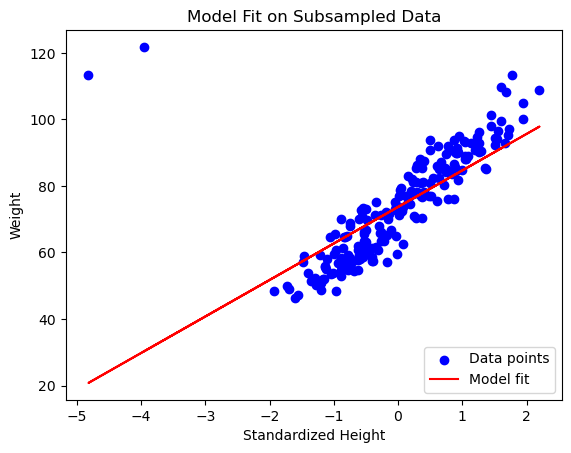

In [72]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

# Visualize the cloud of points and the model fit
plt.scatter(tx[:, 1], y, color='blue', label='Data points')
plt.plot(tx[:, 1], tx.dot(gd_ws[-1]), color='red', label='Model fit')
plt.xlabel('Standardized Height')
plt.ylabel('Weight')
plt.title('Model Fit on Subsampled Data')
plt.legend()
plt.show()

In [ ]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 6. Subgradient descent

In [73]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************
    error = y - tx.dot(w)
    #Using chain rule for the subgradient of the MAE
    subgradient = -np.sign(error).dot(tx) / y.shape[0]
    return subgradient

In [74]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        subgradient = compute_subgradient_mae(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        w = w - gamma * subgradient
        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [75]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=2869.8351145358524, w0=0.7, w1=6.109524327590712e-16
SubGD iter. 1/499: loss=2818.2326504374046, w0=1.4, w1=1.2219048655181425e-15
SubGD iter. 2/499: loss=2767.120186338956, w0=2.0999999999999996, w1=1.832857298277214e-15
SubGD iter. 3/499: loss=2716.4977222405073, w0=2.8, w1=2.443809731036285e-15
SubGD iter. 4/499: loss=2666.365258142059, w0=3.5, w1=3.054762163795356e-15
SubGD iter. 5/499: loss=2616.72279404361, w0=4.2, w1=3.665714596554428e-15
SubGD iter. 6/499: loss=2567.570329945162, w0=4.9, w1=4.276667029313499e-15
SubGD iter. 7/499: loss=2518.9078658467133, w0=5.6000000000000005, w1=4.887619462072571e-15
SubGD iter. 8/499: loss=2470.735401748265, w0=6.300000000000001, w1=5.498571894831642e-15
SubGD iter. 9/499: loss=2423.052937649817, w0=7.000000000000001, w1=6.109524327590714e-15
SubGD iter. 10/499: loss=2375.8604735513677, w0=7.700000000000001, w1=6.720476760349785e-15
SubGD iter. 11/499: loss=2329.1580094529195, w0=8.4, w1=7.331429193108857e-15
SubGD it

In [76]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

ModuleNotFoundError: No module named 'ipywidgets'

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [77]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        
        for batch_y, batch_tx in batch_iter(y, tx, batch_size):
            subgradient = compute_subgradient_mae(batch_y, batch_tx, w)
            loss = compute_loss(batch_y, batch_tx, w)
            w = w - gamma * subgradient
            ws.append(w)
            losses.append(loss)
        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [78]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=1446.407839559022, w0=0.7, w1=-0.9767974789419188
SubSGD iter. 1/499: loss=3789.823348670773, w0=1.4, w1=-0.698670510140231
SubSGD iter. 2/499: loss=3774.0394767420953, w0=2.0999999999999996, w1=-0.4543577864310967
SubSGD iter. 3/499: loss=4989.309805447026, w0=2.8, w1=0.5583205549216702
SubSGD iter. 4/499: loss=2277.1316821291607, w0=3.5, w1=0.7570814207401947
SubSGD iter. 5/499: loss=5359.586331130035, w0=4.2, w1=1.9378861214400906
SubSGD iter. 6/499: loss=2522.8725632219125, w0=4.9, w1=1.905457113672731
SubSGD iter. 7/499: loss=1887.1147534685576, w0=5.6000000000000005, w1=1.3513500396761502
SubSGD iter. 8/499: loss=3158.0777224495478, w0=6.300000000000001, w1=1.5476946331933783
SubSGD iter. 9/499: loss=3156.3187228847382, w0=7.000000000000001, w1=1.7588590277595821
SubSGD iter. 10/499: loss=1179.6474507062592, w0=7.700000000000001, w1=1.0553541093687195
SubSGD iter. 11/499: loss=2444.0709884087305, w0=8.4, w1=1.3438513739261353
SubSGD iter. 12/499: loss=144

In [ ]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))